In [39]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.input_size = input_size
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)  # No need to reshape self.weights
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))



In [40]:
x = pd.read_csv('./XY/X.csv')
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.741074,0.032447
1,4.794975,0.404499
2,1.672767,3.685057
3,3.571626,1.126299
4,4.146296,2.519701
...,...,...
194,3.035141,4.776586
195,4.343927,1.170200
196,3.656601,2.025832
197,4.031428,3.240811


In [41]:
y = pd.read_csv('./XY/Y.csv')   
y = y.drop(y.columns[0], axis=1)
y.columns = ['Y']
y

,Y
0,0
1,0
2,1
3,0
4,0
...,...
194,1
195,0
196,0
197,0


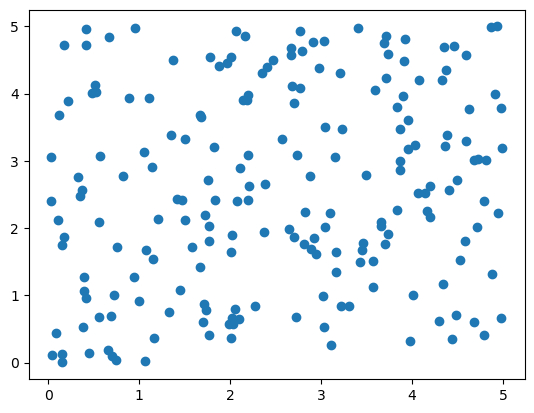

In [42]:
plt.scatter(x['X'], x['Y'])

In [43]:

x = x.to_numpy()
y = y.to_numpy()


perceptron = Perceptron(input_size=training_inputs.shape[1], epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(x, y)


    


ValueError: shapes (2,) and (6,) not aligned: 2 (dim 0) != 6 (dim 0)

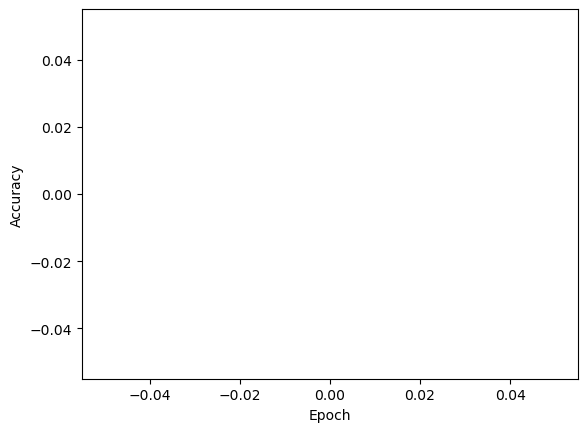

In [37]:
# Plot the accuracy graph
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

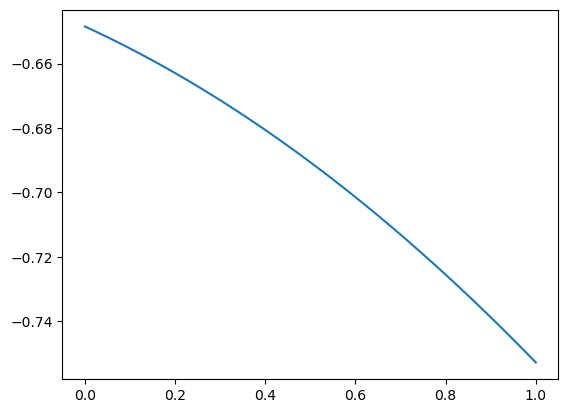

In [38]:
# Plot the decision boundary
x_values = np.linspace(0, 1, 100)
y_values = -(perceptron.weights[0] + perceptron.weights[1] * x_values + perceptron.weights[3] * x_values**2) / perceptron.weights[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(x['X'], x['Y'], c=y['Y'], cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()